In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
! pip install tensorflow

In [4]:
! pip install matplotlib

  Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl.metadata (162 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl.metadata (9.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.8.4-cp312-cp312-win_amd64.whl (7.7 MB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.51.0-cp312-cp312-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl (56 kB)
Using cached pillow-10.3.0-cp312-cp312-win_amd64.whl (2.5 MB)
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


In [5]:
# Import Statements
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [6]:
# Declare some constants
Image_Size = (256,256)
Batch_Size = 32

In [8]:
# Load Dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/Coding/MachineLearning/FloraFinder/Dataset/Indian Medicinal Leaves Image Datasets/Medicinal plant dataset",
    shuffle = True,
    image_size = Image_Size,
    batch_size = Batch_Size,
)

Found 5945 files belonging to 40 classes.


In [9]:
# Viewing the class names
Class_Names = dataset.class_names
print(Class_Names)
print("No of classes : ",len(Class_Names))

['Aloevera', 'Amla', 'Amruta_Balli', 'Arali', 'Ashoka', 'Ashwagandha', 'Avacado', 'Bamboo', 'Basale', 'Betel', 'Betel_Nut', 'Brahmi', 'Castor', 'Curry_Leaf', 'Doddapatre', 'Ekka', 'Ganike', 'Gauva', 'Geranium', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jasmine', 'Lemon', 'Lemon_grass', 'Mango', 'Mint', 'Nagadali', 'Neem', 'Nithyapushpa', 'Nooni', 'Pappaya', 'Pepper', 'Pomegranate', 'Raktachandini', 'Rose', 'Sapota', 'Tulasi', 'Wood_sorel']
No of classes :  40


In [10]:
# Exploring the dataset
print("total data : ",len(dataset))

total data :  186


In [ ]:
186 * 32

In [ ]:
print(dataset.take(1))

In [11]:
for image_batch, batch_label in dataset.take(1): # Takes single batch = 32
    print("Single batch size",len(image_batch))
    print("Single image",image_batch[0].numpy())
    print("Single image shape",image_batch[0].shape)
    print("Batch labels as tensor : ",batch_label)
    print("Batch labels as numpy : ",batch_label.numpy())

Single batch size 32
Single image [[[ 82.65457   55.549103  48.530975]
  [ 56.048615  28.943146  21.86081 ]
  [ 80.713776  53.282715  43.51535 ]
  ...
  [111.35748   76.99811   53.076233]
  [121.12558   85.15683   61.141205]
  [132.85962   95.85962   69.85962 ]]

 [[ 88.985016  59.826813  52.166656]
  [ 60.548187  31.389984  23.073578]
  [ 62.893555  33.8584    23.16092 ]
  ...
  [ 95.66211   61.201385  37.583557]
  [141.49399  105.522766  81.51456 ]
  [140.57153  103.41333   77.88794 ]]

 [[ 84.0206    53.40674   43.799316]
  [ 88.01758   56.96289   46.96289 ]
  [ 55.425354  23.651917  12.388245]
  ...
  [111.49307   76.49307   54.493073]
  [141.89276  105.90839   81.93964 ]
  [130.54434   92.54434   69.54434 ]]

 ...

 [[156.33054  136.77136  127.76724 ]
  [157.64133  138.18018  126.87375 ]
  [179.56369  161.09103  145.82736 ]
  ...
  [153.28113  133.49011  120.28113 ]
  [150.35416  130.56314  117.35416 ]
  [154.53885  134.74783  121.53885 ]]

 [[128.2381   107.409454  98.68567 ]
  [

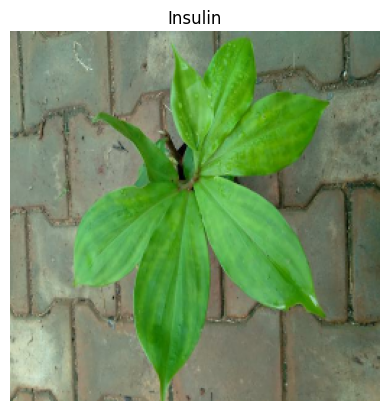

In [12]:
# Visualizing the dataset
for batch_images, batch_labels in dataset.take(1):
    plt.imshow(batch_images[0].numpy().astype("uint8"))
    plt.title(Class_Names[batch_labels[0]])
    plt.axis("off")

In [13]:
# Dataset Splitting

def train_test_val_split(dataset,train_size=0.8,test_size=0.1,val_size=0.1,shuffle = True, shuffle_size = 10000):
    
    if shuffle:
        dataset.shuffle(shuffle_size, seed = 12)
    
    data_len = len(dataset)
    # 80% of training data
    train_data = dataset.take(int(data_len * train_size))
    # 10% test data
    test_data = dataset.skip(len(train_data)).take(int(data_len * test_size))
    # 10% validate data
    val_data =  dataset.skip(len(train_data)).skip(int(data_len * test_size))
    
    return train_data, test_data, val_data

print("func defined")

func defined


In [14]:
train_data, test_data, val_data = train_test_val_split(dataset)
print("Len of training data : ",len(train_data))
print("Len of testing data : ",len(test_data))
print("Len of validate data : ",len(val_data))

Len of training data :  148
Len of testing data :  18
Len of validate data :  20


In [15]:
# Cache
train_data = train_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

print("cached")

cached


In [16]:
# Data Rescalling and Resizing
rescale_and_resize_layer = tf.keras.Sequential(
[
    layers.Resizing(256,256),
    layers.Rescaling(1.0/255)
])
print(rescale_and_resize_layer)

<Sequential name=sequential, built=False>


In [17]:
# Data Augmentation
augmentaion_layer = tf.keras.Sequential(
[
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

print(augmentaion_layer)

<Sequential name=sequential_1, built=False>


In [37]:
# CNN Architecture

inp_shape = (256, 256,3)
model = models.Sequential([
    rescale_and_resize_layer,
    augmentaion_layer,
    layers.Conv2D(32,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size= (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(40,activation = "softmax"),
    
])
print("Architecture created")

Architecture created


In [58]:
# Build the Architecture
model.build(input_shape = inp_shape)
print("Model build successful.")

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_4" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(256, 256, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(256, 256, 3), dtype=float32, sparse=None, name=keras_tensor_115>',)
  • kwargs={'mask': 'None'}

In [49]:
# Model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_54 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 40)               │         2,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,152 (727.16 KB)

 Trainable params: 186,152 (727.16 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Compile model
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    reduction='sum_over_batch_size',
    name='sparse_categorical_crossentropy'
),
    metrics = ["accuracy"]
)
print("model compiled")

model compiled


In [38]:
for b,l in train_data.take(1):
    print(b[0].shape)

(256, 256, 3)


In [60]:
# Training the model
history = model.fit(
    train_data,
    epochs = 50,
    batch_size = 32,
    verbose = 1,
    validation_data = val_data,

)

Epoch 1/50


ValueError: Sequential model 'sequential_14' has already been configured to use input shape (256, 256, 3). You cannot build it with input_shape (None, 256, 256, 3)

In [18]:
# CNN Architecture
cnn_model = models.Sequential(
[
    rescale_and_resize_layer,
    augmentaion_layer,
    layers.Conv2D(64, (3,3), activation = "relu" ),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation = "relu" ),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(40,activation = "softmax"),
])
print("Model Arch completed")

Model Arch completed


ValueError: Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (256, 256, 3)

In [19]:
cnn_model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
),
    metrics = ["accuracy"]
)
print("Model compiled")

Model compiled


In [20]:
cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = cnn_model.fit(
    train_data,
    epochs = 20,
    verbose = 1,
    batch_size = Batch_Size,
    validation_data = val_data,
)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1659s 11s/step - accuracy: 0.0602 - loss: 4.3425 - val_accuracy: 0.1896 - val_loss: 3.0137
Epoch 2/20
107/148 ━━━━━━━━━━━━━━━━━━━━ 6:56 10s/step - accuracy: 0.2065 - loss: 2.9179

In [ ]:
# Evaluate model
scores = cnn_model.evaluate(test_data)
print(scores)

In [ ]:
# Visualize model bench mark
plt.subplot(1,2,1)
plt.plot(range(25),history.history["accuracy"],label ="Accuracy")
plt.plot(range(25),history.history["val_accuracy"],label ="Val Accuracy")
plt.legend(loc="lower right")

In [ ]:
for batch_image, batch_label in test_data.take(1):
#     for i in range(12):
        plt.imshow(batch_image[0].numpy().astype("uint8"))
        plt.title(Class_Names[batch_label[0]])
        t = model.predict(batch_image)[0]
        print(f"predict : {t} ")
        print(Class_Names[np.argmax(t)])
        

In [45]:
# Predict function 
def predict_image(model, img):
    img_arr = tf.keras.utils.img_to_array(img[i].numpy())
    img_arr = tf.expand_dims(img_arr)
    pred = model.predict(img_arr)
    pred_class = Class_Names[np.argmax(pred[0])]
    confidence = round(100* (np.max(pred[0])),2)
    return pred_class,confidence
print("Func defined")

Func defined


In [ ]:
for images, labels in test_data.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        pred_class, conf = predict_image(cnn_model,images[i].numpy())
        actual_class = Class_Names[labels[i]]
        plt.title(f"actual : {actual_class} \n pred : {pred_class},{conf}")
        plt.axis("off")

In [ ]:
# Save model
model_version = 1
cnn_model.save(f"./models/model-{model_version}")